In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data_clean/thai_housing_price_data_cleaned.csv', index_col = 0)

In [3]:
df

,areas,beds,baths,listing_date,prices,title_len,des_len,school,airport,city,association,view,ใหม่
0,50.0,3.0,3.0,2021-10-19,2490000,197,1788,1,1,1,0,0,1
1,82.0,3.0,4.0,2021-10-18,23900000,86,666,0,0,0,0,0,0
2,40.0,3.0,2.0,2021-10-18,3990000,85,1594,1,0,0,1,0,0
3,100.0,4.0,3.0,2021-10-18,5500000,53,832,0,0,0,0,0,0
4,50.0,3.0,2.0,2021-10-18,4200000,59,306,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,100.0,5.0,5.0,2021-09-13,9900000,34,782,0,0,0,0,1,0
2396,100.0,5.0,3.0,2021-09-13,7500000,34,726,0,0,0,0,0,0
2397,40.0,2.0,1.0,2021-09-23,1800000,75,164,0,0,0,1,0,0
2398,NaN,3.0,3.0,2021-09-15,4600000,13,693,1,0,0,0,0,0


In [4]:
# drop houses with prices lower than 150,000 because these prices are too low to be true
df.drop(df[df['prices'] < 150000].index, inplace=True)

In [5]:
import datetime as dt

In [6]:
# turn listing date from strings to float
df['listing_date'] = pd.to_datetime(df['listing_date'])

In [7]:
df['listing_date']

0      2021-10-19
1      2021-10-18
2      2021-10-18
3      2021-10-18
4      2021-10-18
          ...    
2395   2021-09-13
2396   2021-09-13
2397   2021-09-23
2398   2021-09-15
2399   2021-09-15
Name: listing_date, Length: 2283, dtype: datetime64[ns]

In [8]:
# Only 2.5% of the data is missing the bed and baths so we can drop those
df['beds'].isna().sum()/df.apply(len)

areas           0.025405
beds            0.025405
baths           0.025405
listing_date    0.025405
prices          0.025405
title_len       0.025405
des_len         0.025405
school          0.025405
airport         0.025405
city            0.025405
association     0.025405
view            0.025405
ใหม่            0.025405
dtype: float64

In [9]:
df.dropna(subset=['beds','baths'], inplace = True)

In [10]:
# 34% of the data has no areas
df['areas'].isna().sum()/df.apply(len)

areas           0.346865
beds            0.346865
baths           0.346865
listing_date    0.346865
prices          0.346865
title_len       0.346865
des_len         0.346865
school          0.346865
airport         0.346865
city            0.346865
association     0.346865
view            0.346865
ใหม่            0.346865
dtype: float64

In [11]:
# deletes 15 and 21 bedrooms 
df = df[(df['beds'] != 15) &(df['beds'] != 21)& (df['beds'] != 32)]

In [12]:
df.groupby('beds').mean()

,areas,baths,prices,title_len,des_len,school,airport,city,association,view,ใหม่
beds,,,,,,,,,,,
1.0,74.176471,1.500000,6.815455e+06,56.272727,869.136364,0.227273,0.090909,0.136364,0.363636,0.136364,0.181818
2.0,67.260606,1.807860,3.379967e+06,70.580786,899.109170,0.262009,0.126638,0.235808,0.362445,0.052402,0.109170
3.0,68.282869,2.563526,6.305615e+06,76.461538,1075.698358,0.319793,0.164218,0.273984,0.490925,0.072602,0.093345
4.0,87.720117,3.459016,1.404096e+07,78.109290,1135.726776,0.313297,0.136612,0.273224,0.491803,0.111111,0.065574
5.0,123.068966,4.633721,2.637166e+07,79.674419,1175.244186,0.337209,0.145349,0.197674,0.331395,0.093023,0.093023
6.0,165.580645,5.622222,2.910200e+07,69.977778,1084.244444,0.244444,0.200000,0.177778,0.266667,0.111111,0.066667
7.0,64.000000,5.416667,3.357833e+07,63.416667,1092.333333,0.250000,0.083333,0.083333,0.416667,0.416667,0.083333
8.0,88.625000,7.461538,4.061154e+07,86.076923,1185.923077,0.153846,0.076923,0.153846,0.153846,0.000000,0.000000
9.0,138.000000,8.333333,1.396667e+07,69.666667,1028.666667,0.666667,0.333333,1.000000,0.666667,0.000000,0.000000


In [13]:
df['areas'].mean()

80.03455425017277

In [14]:
def fill_in_area(areas):
    if np.isnan(areas):
        return df['areas'].mean()
    else:
        return areas

In [15]:
df['areas'] = df.apply(lambda x: fill_in_area(x['areas']), axis=1)

<ipython-input-15-2baf857104d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['areas'] = df.apply(lambda x: fill_in_area(x['areas']), axis=1)


In [16]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

areas           0
beds            0
baths           0
listing_date    0
prices          0
title_len       0
des_len         0
school          0
airport         0
city            0
association     0
view            0
ใหม่            0
dtype: int64

In [17]:
df['listing_date'] = df['listing_date'].map(dt.datetime.toordinal)

<ipython-input-17-e9883aa0a438>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['listing_date'] = df['listing_date'].map(dt.datetime.toordinal)


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
y = df['prices']
X = df.drop('prices', axis = 1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
#importing the library
from sklearn.linear_model import LinearRegression,Lasso

In [22]:
# starting with multiple linear regression as a based line
linear_model = LinearRegression()

In [23]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [24]:
predictions = linear_model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

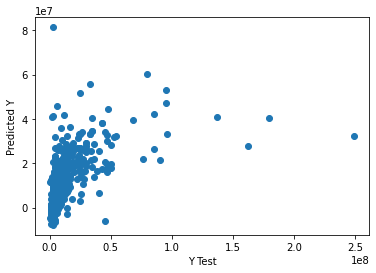

In [25]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [26]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6755659.78101902
MSE: 230333044787831.28
RMSE: 15176727.077595858


In [27]:
# so far the Linear Regression model is doing terrible at predicting the model

In [28]:
# lasso regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [29]:
# define model
lasso_model = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(lasso_model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 6557123.785 (765703.029)


In [30]:
lasso_model.fit(X_train, y_train)

Lasso()

In [31]:
lasso_predict = lasso_model.predict(X_test)

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(lasso_model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, verbose=2)

In [34]:
# perform the search
#results = search.fit(X, y)

In [35]:
# summarize
#print('MAE: %.3f' % results.best_score_)
#print('Config: %s' % results.best_params_)

In [36]:
# use alpha 0.99
# define model
lasso_model = Lasso(alpha=0.99)
lasso_model.fit(X_train,y_train)
lasso_predictions = lasso_model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

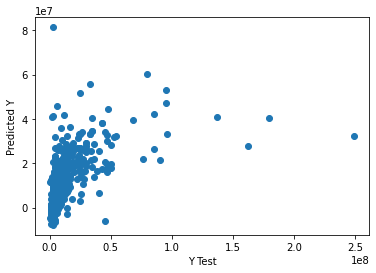

In [37]:
plt.scatter(y_test,lasso_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [38]:
print('MAE:', metrics.mean_absolute_error(y_test, lasso_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lasso_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_predictions)))

MAE: 6755658.561687645
MSE: 230333043027618.8
RMSE: 15176727.01960534


In [39]:
#The lasso model is doing way better than the linear regression

In [40]:
# random forest regression (because there are alot of valuables)
from sklearn.ensemble import RandomForestRegressor

In [41]:
rfc = RandomForestRegressor(n_estimators=600)

In [42]:
rfc.fit(X_train,y_train)

RandomForestRegressor(n_estimators=600)

In [43]:
rfc_predictions = rfc.predict(X_test)

Text(0, 0.5, 'Predicted Y')

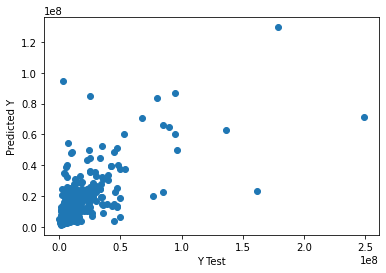

In [44]:
plt.scatter(y_test,rfc_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, rfc_predictions))
print('MSE:', metrics.mean_squared_error(y_test, rfc_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfc_predictions)))

MAE: 5178534.021141552
MSE: 167852123395374.9
RMSE: 12955775.677101502


In [46]:
#The rfc preformed the best

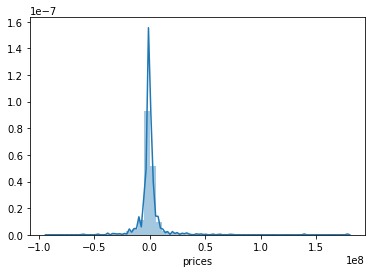

In [51]:
sns.distplot((y_test-rfc_predictions),bins=50);

# Productization

In [47]:
# pickle the model (rfc)
import pickle

pickl = {'model': rfc}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [48]:
# build a Flask API
def load_models():
    file_name = "model_file.p"
    with open(file_name, 'rb') as pickled:
        data = pickle.load(pickled)
        model = data['model']
    return model

In [49]:
load_models().predict(X_test.iloc[1,:].values.reshape(1,-1))

array([4311340.83333333])

In [50]:
list(X_test.iloc[1,:])

[49.0, 3.0, 2.0, 738057.0, 75.0, 657.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]